In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import numpy as np
import time
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Time seris EDA

In [3]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join( '..', 'input')

outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow
plt.set_cmap(CMAP);
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

# Define constants for data manipulation
TEST_SIZE = 0.2
NOISE = 0.2
N_SAMPLE = 1024

<Figure size 640x480 with 0 Axes>

In [4]:
# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',    
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'savefig.dpi': 75,
          'image.cmap': 'summer',
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

'''plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))
'''
np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('display.precision', 2)

__all__ = ['np', 'display', 'plt', 'pd', 'sklearn', 'seaborn']

In [5]:
df=pd.read_csv(inpDir+"/"+"a10.csv")

In [6]:
df.head()

,date,value
0,1991-07-01,3.53
1,1991-08-01,3.18
2,1991-09-01,3.25
3,1991-10-01,3.61
4,1991-11-01,3.57


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [8]:
df["date"]=pd.to_datetime(df["date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


<Axes: xlabel='date', ylabel='value'>

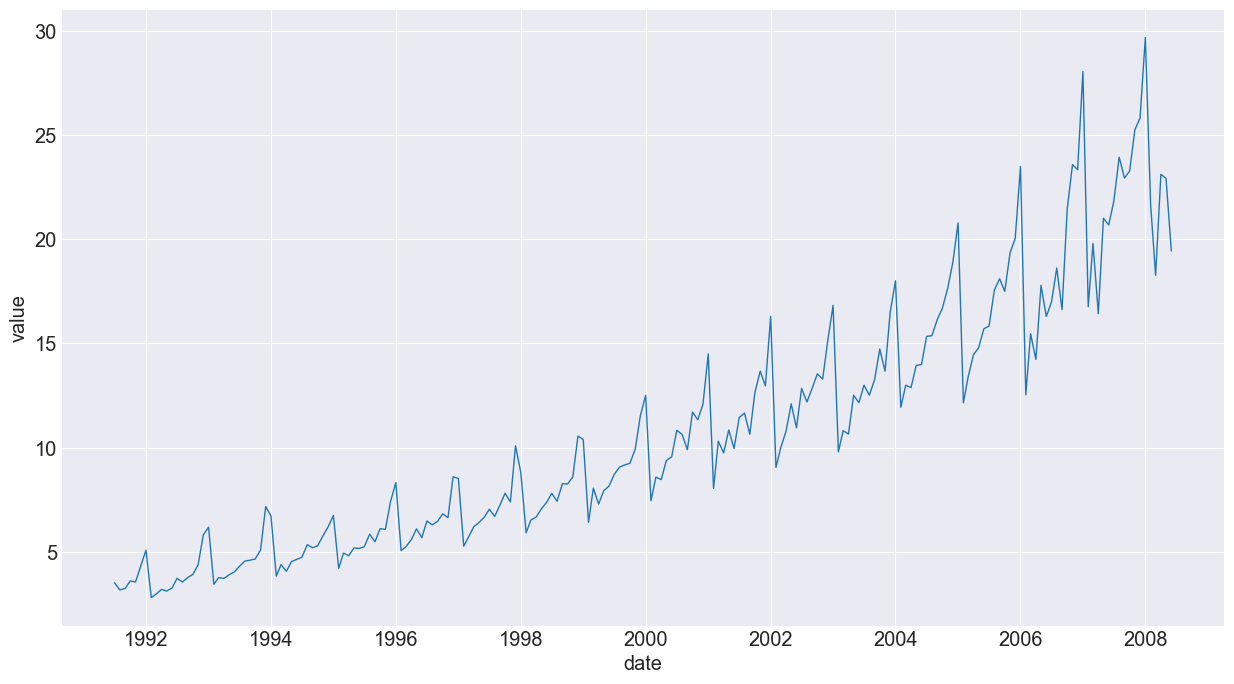

In [10]:
sns.lineplot(data=df,x="date",y="value")

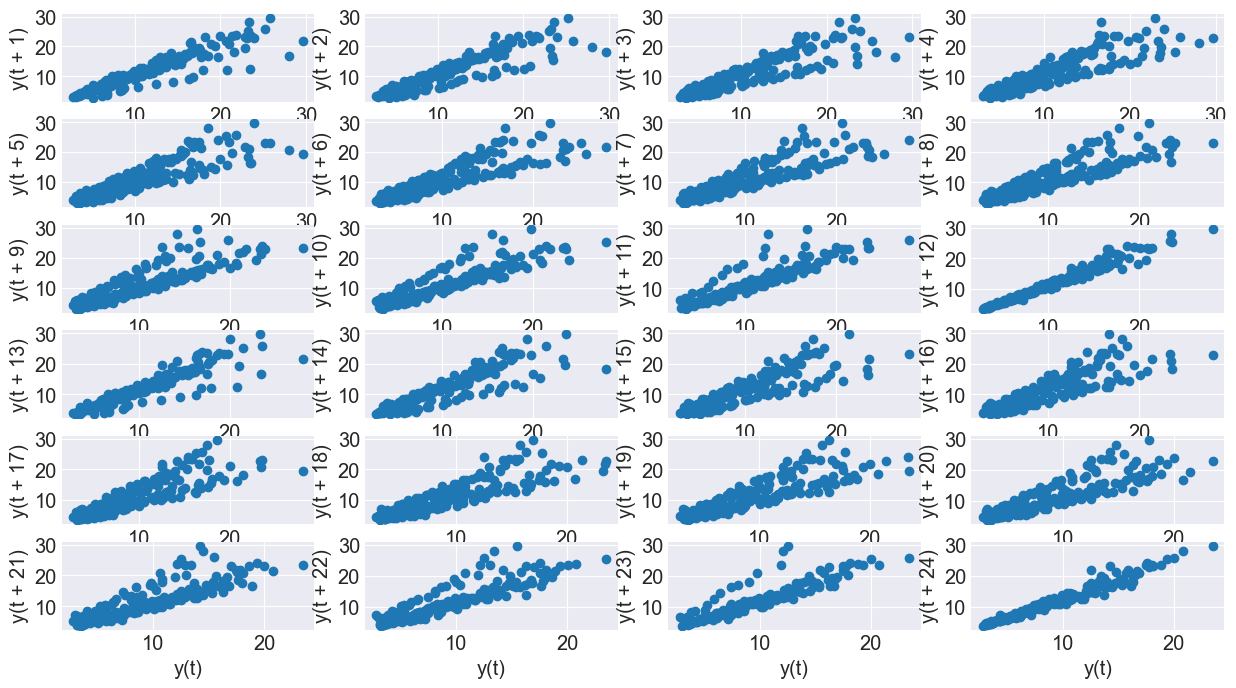

In [11]:
fig,axs=plt.subplots(6,4)
for count,ax in enumerate(axs.ravel()):
    pd.plotting.lag_plot(df["value"],lag=count+1,ax=ax)

In [12]:
lag=np.arange(1,15)
data_acf=[]
for l in lag:
    data_acf.append(df["value"].autocorr(l))           

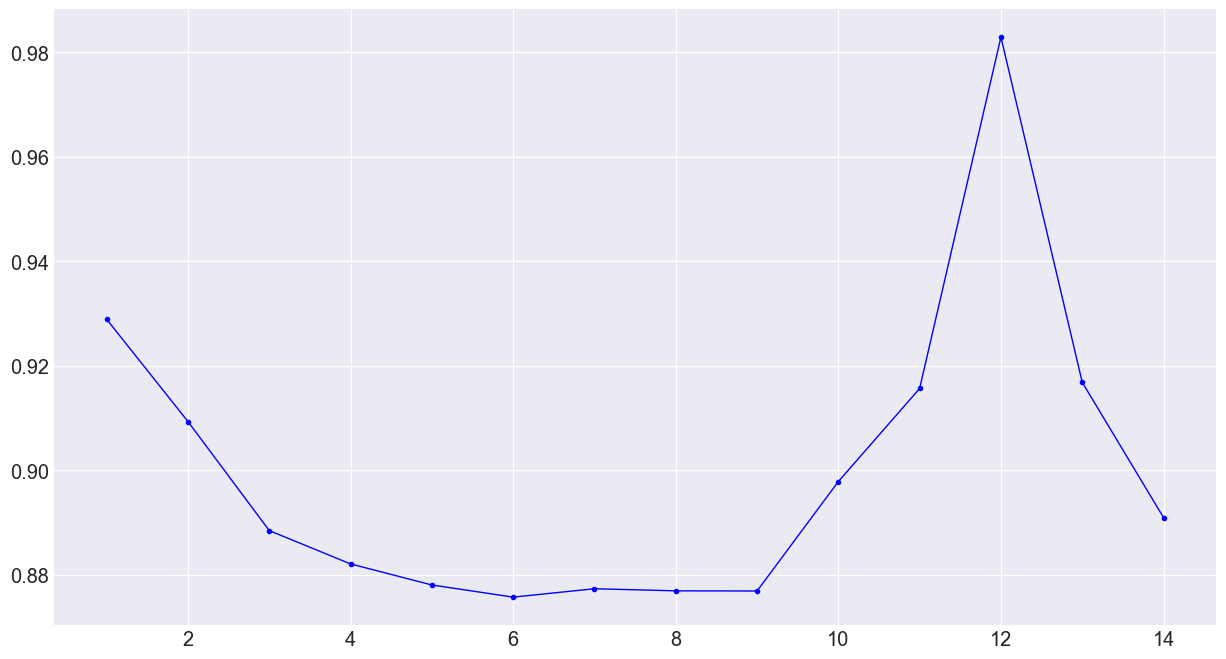

In [13]:
fig,ax = plt.subplots()

ax.plot(lag,data_acf,marker ='.', color = 'b')

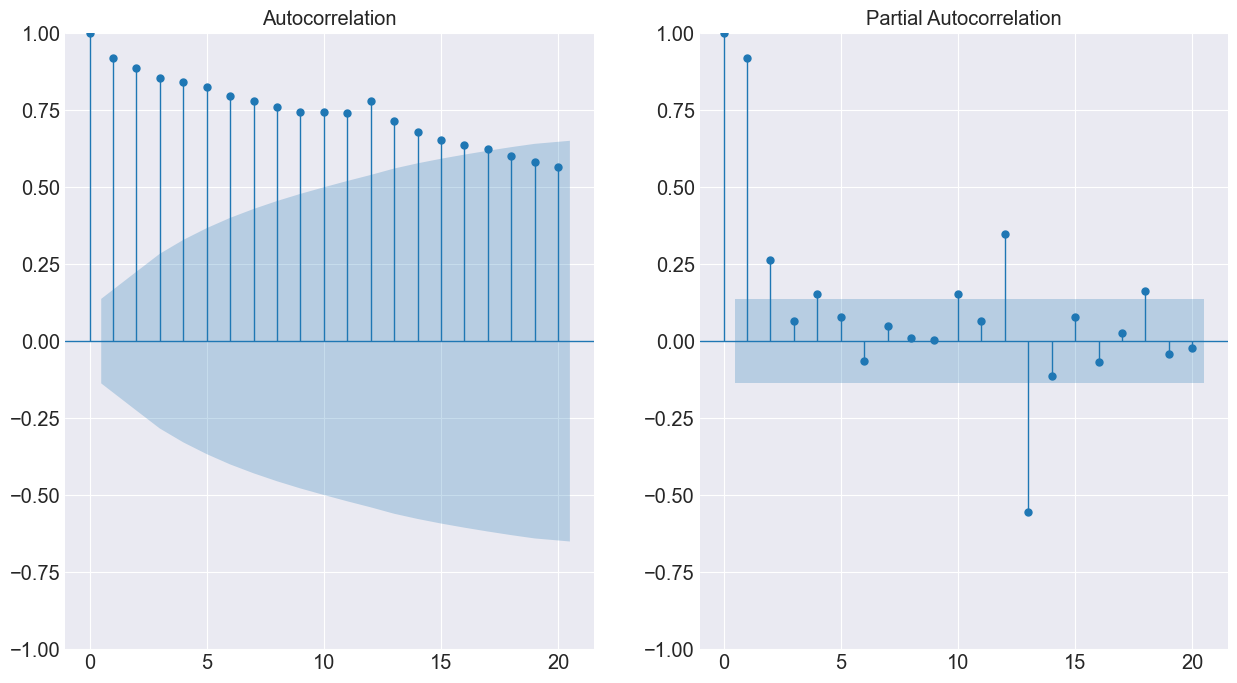

In [14]:
fig,axs=plt.subplots(1,2)
_=plot_acf(df['value'],lags=20,ax=axs[0])
_=plot_pacf(df['value'],lags=20,ax=axs[1])

In [17]:
def get_trend(timerseris,deg=3):
    x=list(range(len(timerseris)))
    y=timerseris.values
    coef=np.polyfit(x,y,deg)
    trend=np.poly1d(coef)(x)
    return pd.Series(trend)

In [18]:
df['trend']=get_trend(df['value'],5)

In [19]:
def get_trend(timeseries,deg = 23):
    x= list(range(len(timeseries)))
    y = timeseries.values
    coef = np.polyfit(x,y,deg)
    trend = np.poly1d(coef)(x)
    return pd.Series(data=trend,index = timeseries.index)
df['Trend'] = get_trend(df['value'])
df.head()

C:\Users\duasp\AppData\Local\Temp\ipykernel_17184\2927483942.py:4: RankWarning: Polyfit may be poorly conditioned
  coef = np.polyfit(x,y,deg)


,date,value,trend,Trend
0,1991-07-01,3.53,3.42,3.37
1,1991-08-01,3.18,3.46,3.37
2,1991-09-01,3.25,3.50,3.50
3,1991-10-01,3.61,3.54,3.63
4,1991-11-01,3.57,3.58,3.71


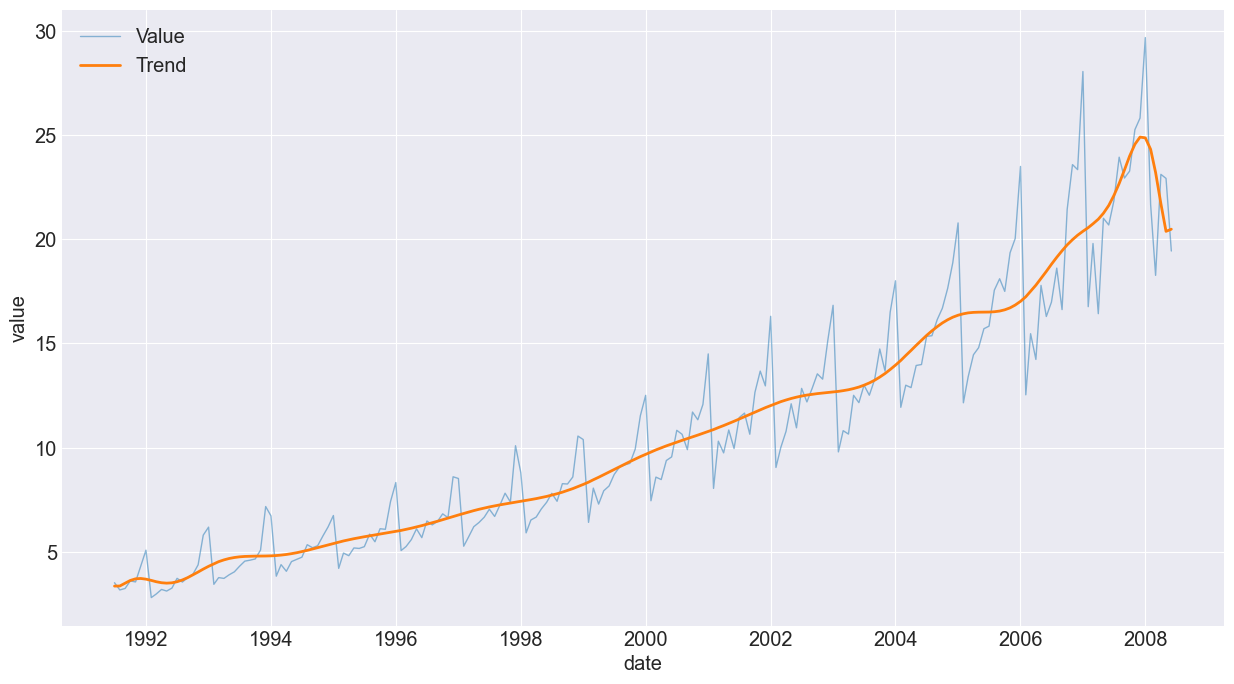

In [20]:
plt.figure()
sns.lineplot(x=df['date'],y=df['value'],alpha = 0.5,label = 'Value')
sns.lineplot(x=df['date'],y=df['Trend'],label = 'Trend',lw = 2)
plt.legend()
plt.show()

In [21]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df

,date,value,trend,Trend,year,month
0,1991-07-01,3.53,3.42,3.37,1991,7
1,1991-08-01,3.18,3.46,3.37,1991,8
2,1991-09-01,3.25,3.50,3.50,1991,9
3,1991-10-01,3.61,3.54,3.63,1991,10
4,1991-11-01,3.57,3.58,3.71,1991,11
...,...,...,...,...,...,...
199,2008-02-01,21.65,23.08,24.31,2008,2
200,2008-03-01,18.26,23.33,23.20,2008,3
201,2008-04-01,23.11,23.59,21.70,2008,4
202,2008-05-01,22.91,23.85,20.37,2008,5


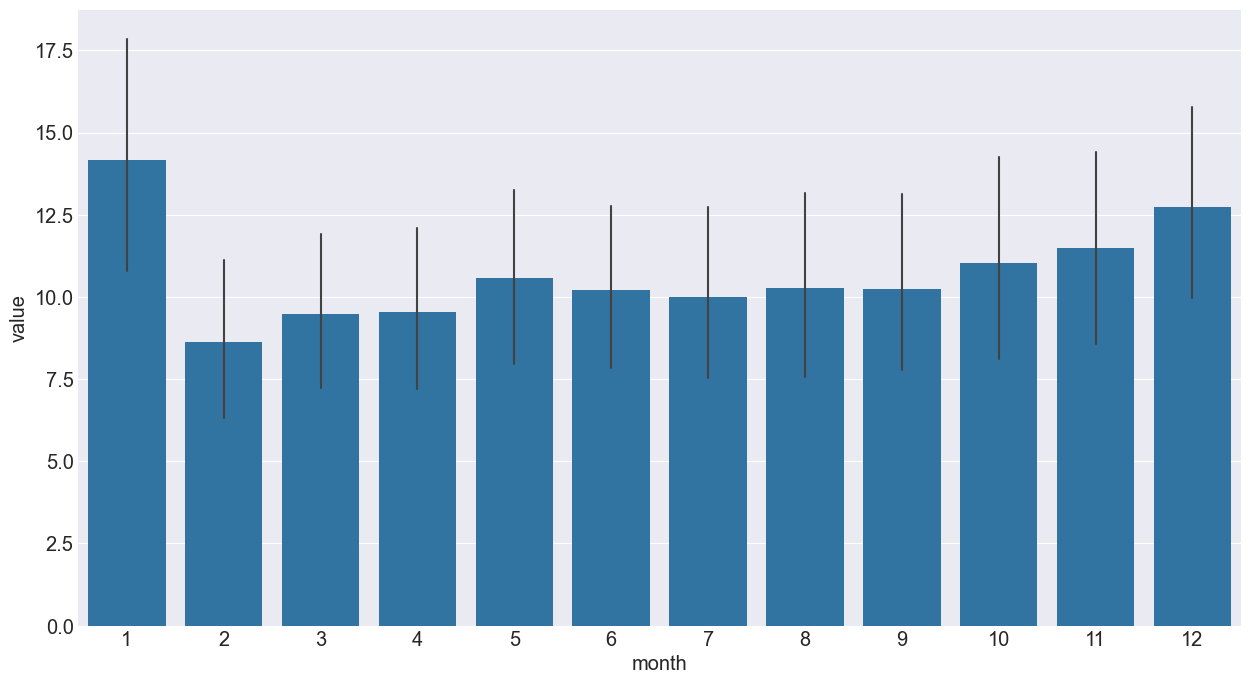

In [22]:
plt.figure()
ax=sns.barplot(data=df,x='month',y='value')

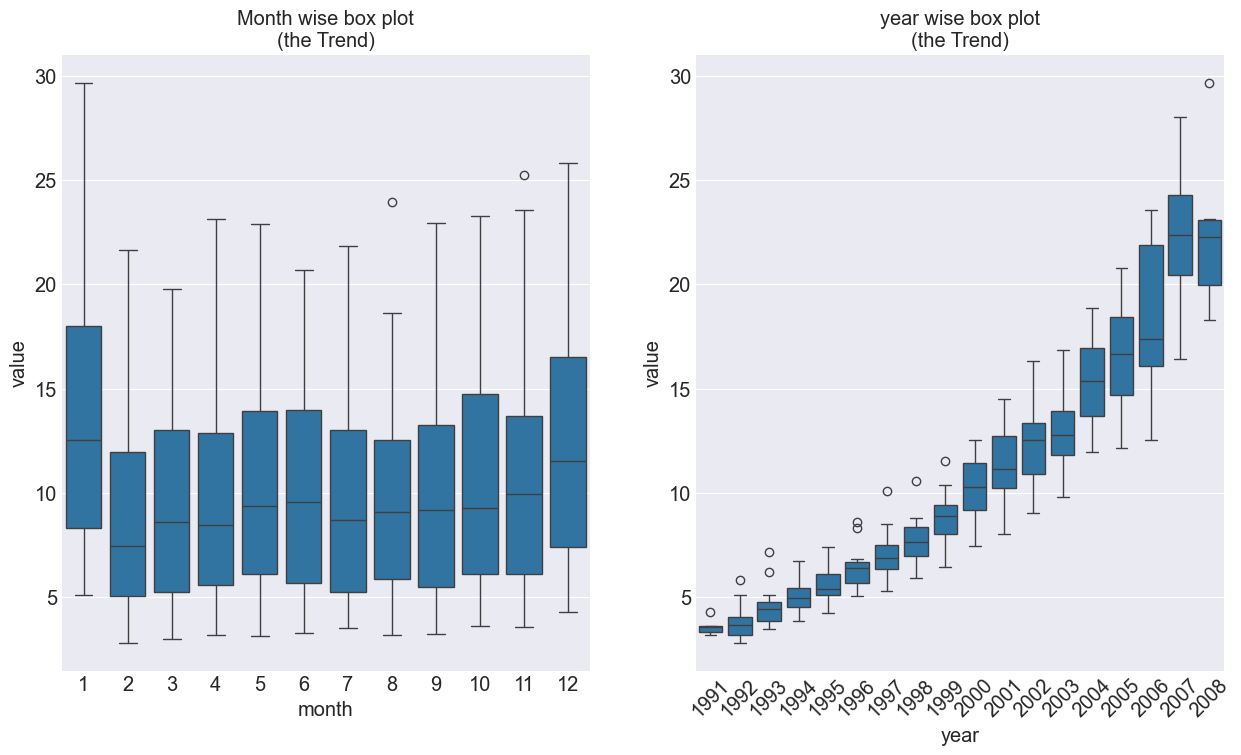

In [39]:
fig,axes = plt.subplots(1,2)

ax = axes[0]
sns.boxplot(x='month',y = 'value',data=df,ax=ax)
ax.set_title('Month wise box plot\n(the Trend)')
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax=  axes[1]
sns.boxplot(x='year',y = 'value',data=df,ax=ax)
ax.set_title('year wise box plot\n(the Trend)')
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()

### Decomposition Of Data

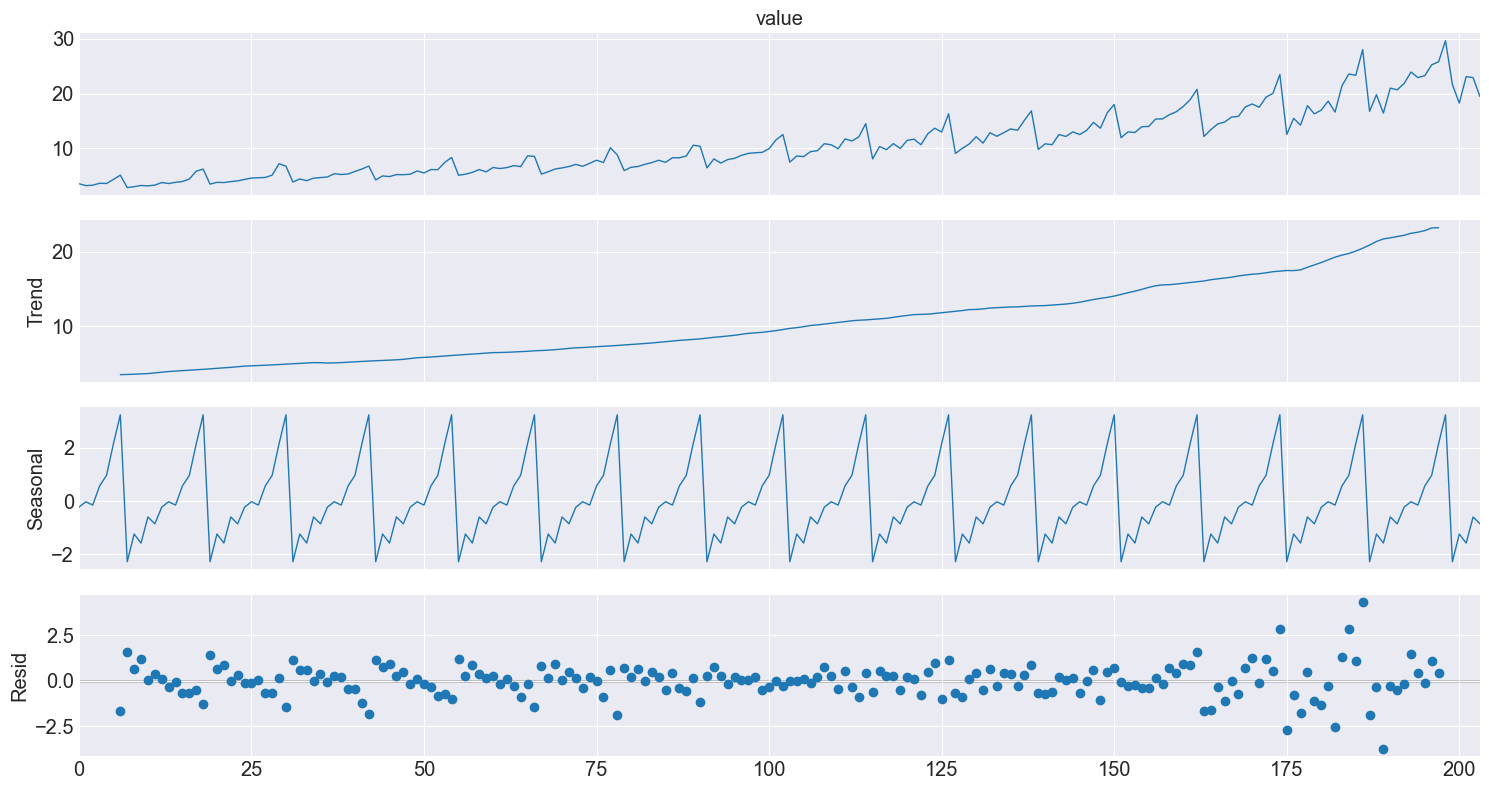

In [24]:
decomposition = sm.tsa.seasonal_decompose(df['value'],model='additive',period=12)
fig = decomposition.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

print('results of Dickey-Fuller Test:')
dftest = adfuller(df[['value']],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic',
                                         'p-value',
                                         '#Lags Used',
                                         'Number of Observation Uses'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)    

results of Dickey-Fuller Test:
Test Statistic                  3.15
p-value                         1.00
#Lags Used                     15.00
Number of Observation Uses    188.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64


In [26]:
month_df = df.set_index('date')
month_df.head()

,value,trend,Trend,year,month
date,,,,,
1991-07-01,3.53,3.42,3.37,1991,7
1991-08-01,3.18,3.46,3.37,1991,8
1991-09-01,3.25,3.50,3.50,1991,9
1991-10-01,3.61,3.54,3.63,1991,10
1991-11-01,3.57,3.58,3.71,1991,11


In [27]:
ts_log = df.set_index('date')
month_df.head()

,value,trend,Trend,year,month
date,,,,,
1991-07-01,3.53,3.42,3.37,1991,7
1991-08-01,3.18,3.46,3.37,1991,8
1991-09-01,3.25,3.50,3.50,1991,9
1991-10-01,3.61,3.54,3.63,1991,10
1991-11-01,3.57,3.58,3.71,1991,11


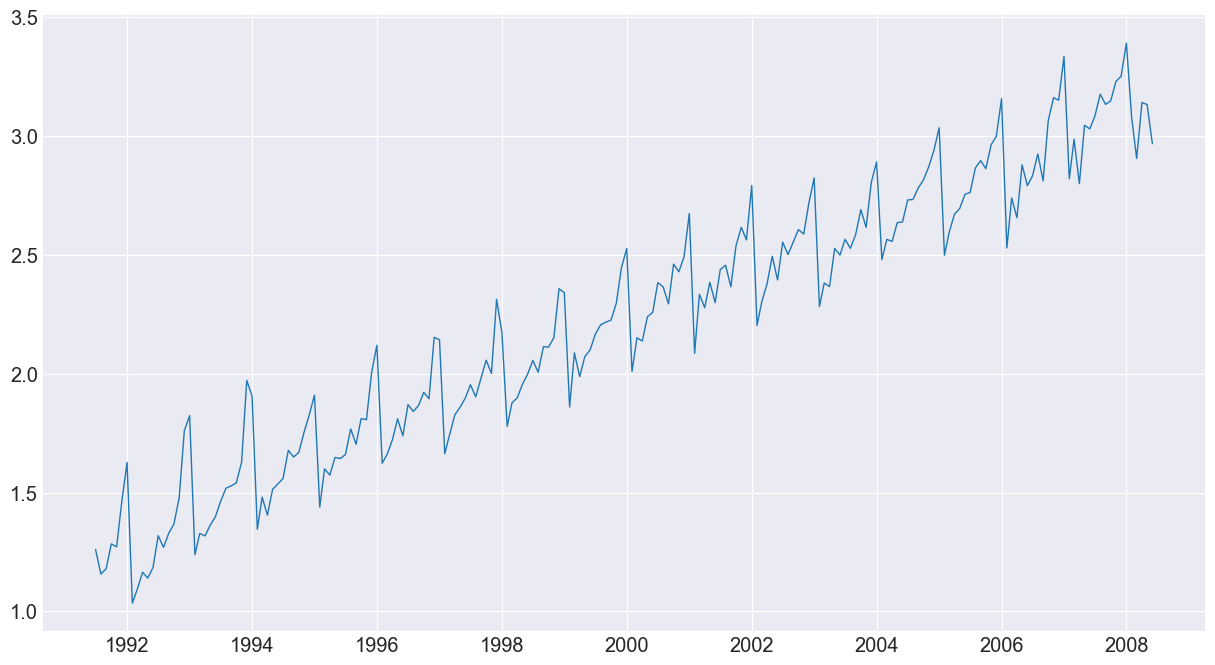

In [28]:
ts_log = np.log(month_df['value'])
plt.plot(ts_log)

In [29]:

dftest = adfuller(ts_log, autolag = 'AIC')

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics',
                                          'p-value',
                                          '#Lags Used',
                                          'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)

Test Statistics                 -0.99
p-value                          0.76
#Lags Used                      14.00
Number of Observations Used    189.00
Critical Value (1%)             -3.47
Critical Value (5%)             -2.88
Critical Value (10%)            -2.57
dtype: float64


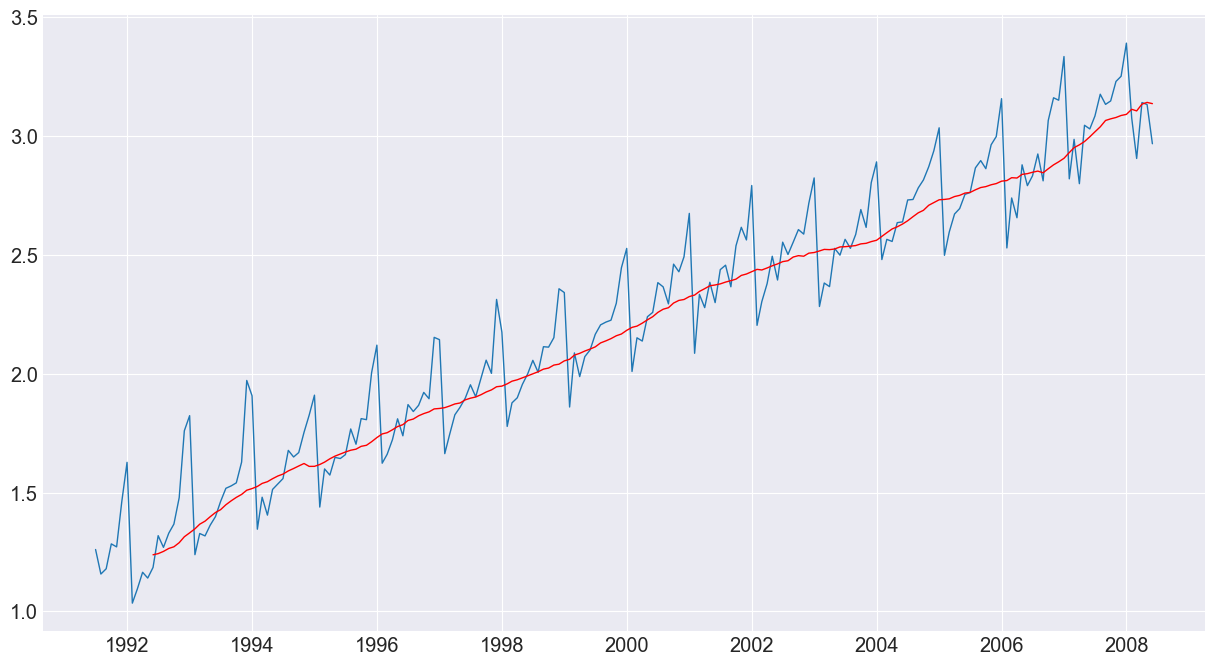

In [30]:
moving_avg=ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color="red")

In [31]:
ts_log_moving_avg_diff = ts_log - moving_avg
display(ts_log_moving_avg_diff.head(12))

date
1991-07-01     NaN
1991-08-01     NaN
1991-09-01     NaN
1991-10-01     NaN
1991-11-01     NaN
1991-12-01     NaN
1992-01-01     NaN
1992-02-01     NaN
1992-03-01     NaN
1992-04-01     NaN
1992-05-01     NaN
1992-06-01   -0.05
Name: value, dtype: float64

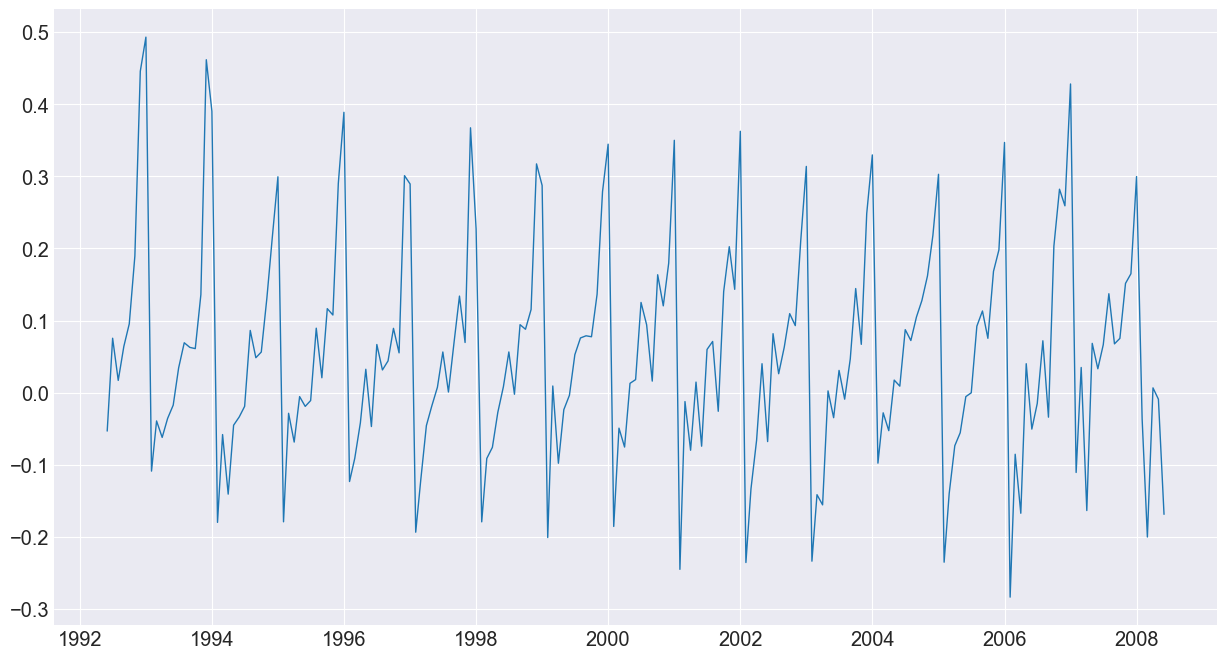

In [32]:
plt.plot(ts_log_moving_avg_diff)